<h1>Week 11 - Clustering<br>
Sherin Alvinia Yonatan - 0706022310013

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

Data Preperation

In [158]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [159]:
# rename
df = df.rename(columns={"Death Percentage": "Death Percentage"})

In [160]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [161]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [162]:
# data shape
df.shape

(225, 10)

In [163]:
# check missing values
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [164]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [165]:
# Check Unique
# So, that it's also can help me to know which one is need to be categorical as ordinal and nominal by looking at the values.
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [166]:
# drop column Other Names
# I dropped it because the data is similar to Country column.
df = df.drop(columns=['Other names'])

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    object 
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Tot Cases//1M pop        225 non-null    int64  
 7   Tot Deaths/1M pop        225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 15.9+ KB


In [168]:
# Check Unique
# So, that it's also can help me to know which one is need to be categorical as ordinal and nominal by looking at the values.
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [169]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

The choropleth map shows the distribution of countries based on their continent classification. It reveals that regions such as Europe and Asia dominate the northern hemisphere, while Africa occupies the central part of the world map. This visualization helps provide geographical context for later clustering analysis of COVID-19 severity across different continents.

In [170]:
import plotly.express as px

fig = px.box(
    df,
    x="Continent",
    y="Total Deaths",
    color="Continent",
    title="Boxplot of Total Deaths by Continent",
    labels={"Continent": "Continent", "Total Deaths": "Total Deaths"},
)
fig.show()


This boxplot illustrates the distribution of total COVID-19 deaths across different continents. North America shows the highest spread and values of total deaths, indicating that the region experienced a significantly greater impact from the pandemic. In contrast, Oceania presents very low and consistent death counts, suggesting a much lower severity in that region.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    object 
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Tot Cases//1M pop        225 non-null    int64  
 7   Tot Deaths/1M pop        225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 15.9+ KB


In [172]:
print(df.columns.tolist())

['Country', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']


In [173]:
# rename
df = df.rename(columns={"Tot\xa0Cases//1M pop": "Tot Cases/1M pop", "Tot\xa0Deaths/1M pop": "Tot Deaths/1M pop"})

In [174]:
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [175]:
print(df.columns.tolist())

['Country', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases/1M pop', 'Tot Deaths/1M pop', 'Death percentage']


encoding and data transformation


In [176]:
df['Country'] = df['Country'].str.strip()
df['Country'] = df['Country'].str.replace('S. Korea', 'South Korea')
df['Country'] = df['Country'].str.replace('UK', 'United Kingdom')
df['Country'] = df['Country'].str.replace('USA', 'United States')

In [177]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy()

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Total Cases', 'Total Deaths', 'Population', 'Tot Cases/1M pop',  'Tot Deaths/1M pop', 'Death percentage']])

df_scaled = pd.DataFrame(df_scaled, columns=['Total Cases', 'Total Deaths', 'Population', 'Tot Cases/1M pop',  'Tot Deaths/1M pop', 'Death percentage'])
df_scaled.head()

,Total Cases,Total Deaths,Population,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
0,-0.276449,-0.204571,0.038789,-0.915487,-0.759994,1.651243
1,-0.263220,-0.247798,-0.231774,-0.287081,0.099982,-0.097285
2,-0.264347,-0.212815,0.073154,-0.905275,-0.791845,0.657760
3,-0.295431,-0.282336,-0.251891,2.623123,0.736164,-0.611015
4,-0.287281,-0.264265,-0.003016,-0.926078,-0.873149,0.271204


In [180]:
df_scaled.describe()

,Total Cases,Total Deaths,Population,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,2.713879e-17,8.881784e-18,-1.578984e-17,7.894919e-17,4.736952e-17,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-3.009443e-01,-2.839181e-01,-2.524428e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01
25%,-2.976287e-01,-2.819631e-01,-2.483707e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01
50%,-2.783629e-01,-2.635925e-01,-2.105007e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01
75%,-1.504507e-01,-1.426217e-01,-9.477552e-02,5.971815e-01,5.852909e-01,3.066382e-01
max,1.097204e+01,1.014493e+01,1.010746e+01,3.863153e+00,4.349575e+00,9.613966e+00


KMeans

In [185]:
# KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=12)
df_clean['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, df_clean['Cluster_KMeans'])
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")


KMeans Silhouette Score: 0.4037


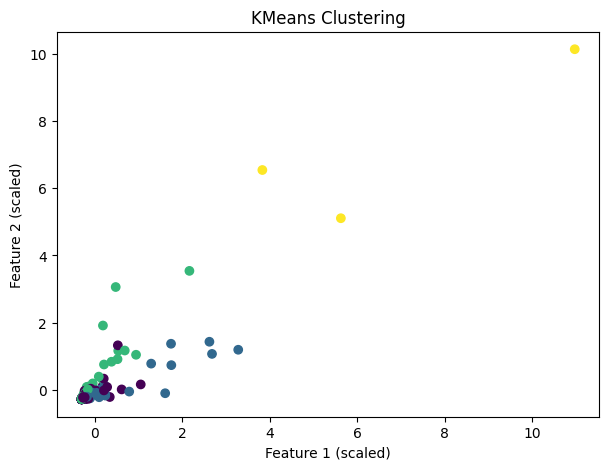

In [189]:
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_clean['Cluster_KMeans'])
plt.title("KMeans Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

The scatter plot visualizes the K-Means clustering results using the first two standardized (scaled) features from the dataset.

Cluster with yellow points: Countries with very high values on both selected scaled features — these represent nations with large populations and significantly high COVID-19 case counts.

Other clusters (purple, green, blue): Countries with much lower scaled feature values, indicating moderate to low case and death rates, grouped more densely near the origin.

Cluster density: Most countries are located near the lower-left region, highlighting that only a small number of countries experienced extremely high COVID-19 impact, causing them to separate clearly into a higher-risk cluster.

Overall, this scatter plot confirms that COVID-19 impact varies widely across countries, and the clustering successfully identifies distinct outlier nations with severe case numbers compared to the majority.

Hierarchical Agglomerative Clustering

In [186]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df_clean['Cluster_HC'] = agg_model.fit_predict(df_scaled)

# Silhouette Score
hc_silhouette = silhouette_score(df_scaled, df_clean['Cluster_HC'])
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette:.4f}")


Hierarchical Clustering Silhouette Score: 0.3924


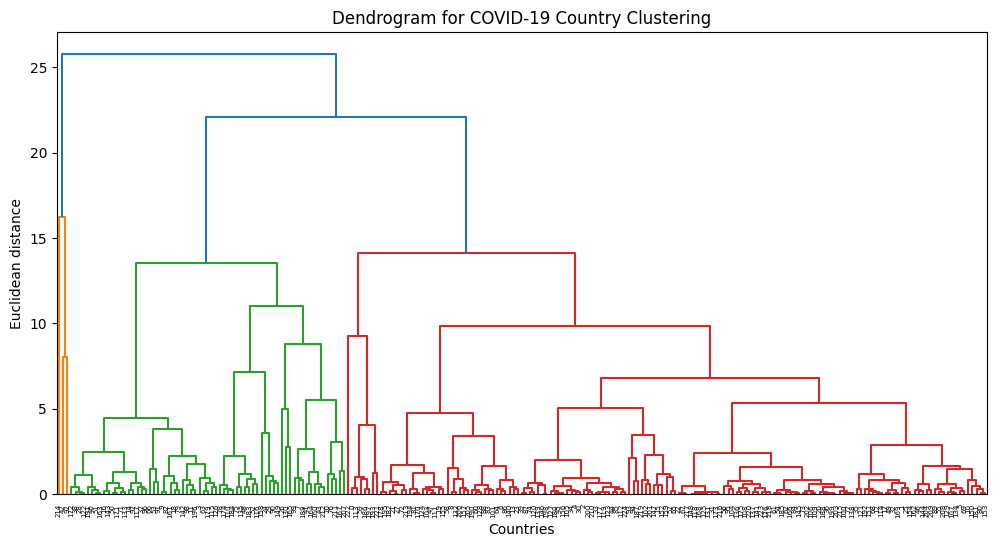

In [187]:
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram for COVID-19 Country Clustering")
plt.xlabel("Countries")
plt.ylabel("Euclidean distance")
plt.show()

The dendrogram displays the hierarchical relationships between countries based on COVID-19 impact indicators after scaling. Countries that are more similar in terms of total cases, deaths, and population metrics are joined together at lower linkage distances, while more different countries merge later at higher distances.

It shows that There are four major clusters, indicated by the largest vertical separations before merges occur.

A small group of high-impact countries is shown merging at very high linkage distances, reflecting extreme case and death rates compared to the rest.

Most countries merge at much lower distances, meaning they share similar COVID-19 profiles with moderate spread relative to population.

The multi-level merging structure highlights how country similarities vary gradually, making hierarchical clustering useful for understanding sub-cluster relationships within global pandemic severity.

Overall, the dendrogram confirms substantial variability in pandemic severity worldwide and clearly separates major outlier countries.

<h2>COMPARE OF SILLHOUETTE SCORE</h2>
The evaluation using silhouette score shows that the KMeans model (score = 0.4037) performs better than the Hierarchical Agglomerative Clustering model (score = 0.3924). Therefore, KMeans was selected as the final clustering model since it provides slightly better-defined cluster boundaries and separation among countries based on COVID-19 indicators.

Cluster summary

In [190]:
kmeans_summary = df_clean.groupby("Cluster_KMeans")[features].mean().round(2)
kmeans_summary


,Total Cases,Total Deaths,Population,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
Cluster_KMeans,,,,,,
0,578960.57,6251.15,3.437570e+07,46774.17,390.21,1.38
1,2809908.15,18006.43,9.794114e+06,330270.43,1796.85,0.59
2,2918481.89,74180.81,3.083903e+07,105169.48,2695.74,3.79
3,51622637.33,729959.67,6.511198e+08,138262.67,2151.33,1.55


Cluster 0 represents countries with moderate levels of total cases and deaths. Their death percentage remains relatively controlled, indicating that although COVID-19 spread exists, healthcare systems are still able to manage the situation effectively.

Cluster 1 includes countries with extremely high infection rates per million population but a very low death percentage. This suggests strong healthcare capacity, wider testing coverage, and effective treatment protocols that help keep mortality low despite widespread infections.

Cluster 2 represents countries facing more severe pandemic outcomes. The notably higher death percentage suggests limited healthcare resources, delayed detection, or more vulnerable populations, leading to higher fatality rates compared to other clusters.

Cluster 3 groups countries with very large populations and correspondingly high total cases and total deaths. While the death percentage is not as severe as Cluster 2, the enormous population size makes controlling the virus and maintaining adequate healthcare capacity a significant challenge.

In [191]:
hc_summary = df_clean.groupby("Cluster_HC")[features].mean().round(2)
hc_summary


,Total Cases,Total Deaths,Population,Tot Cases/1M pop,Tot Deaths/1M pop,Death percentage
Cluster_HC,,,,,,
0,647455.34,8115.66,2.165901e+07,62293.05,621.9,1.62
1,21591891.00,263013.00,1.421539e+09,15380.50,187.0,2.10
2,3973095.76,50502.30,2.025144e+07,311517.42,2193.7,1.03
3,81839052.00,1008222.00,3.344006e+08,244734.00,3015.0,1.23


Cluster 0 consists of countries with moderate total cases and deaths, but their deaths per million population are relatively higher. This indicates some challenges in healthcare capacity, resulting in a higher fatality impact compared to their population size.

Cluster 1 includes highly populated countries with low infection and death rates per million population. Even though total cases and deaths are large in number, the impact becomes much smaller when adjusted to the population scale. Their fatality rate is slightly higher, showing that healthcare pressure may still be significant in large populations.

Cluster 2 represents countries with very high infection and death rates per million population but the lowest death percentage. This suggests very extensive testing, strong healthcare systems, and effective treatment that successfully reduces fatalities despite widespread transmission.

Cluster 3 consists of countries with extremely high total cases and deaths, as well as high infection and mortality levels per million population. This cluster shows a severe pandemic impact, where both the scale of spread and death burden challenge national healthcare systems.

Cluster Visualization

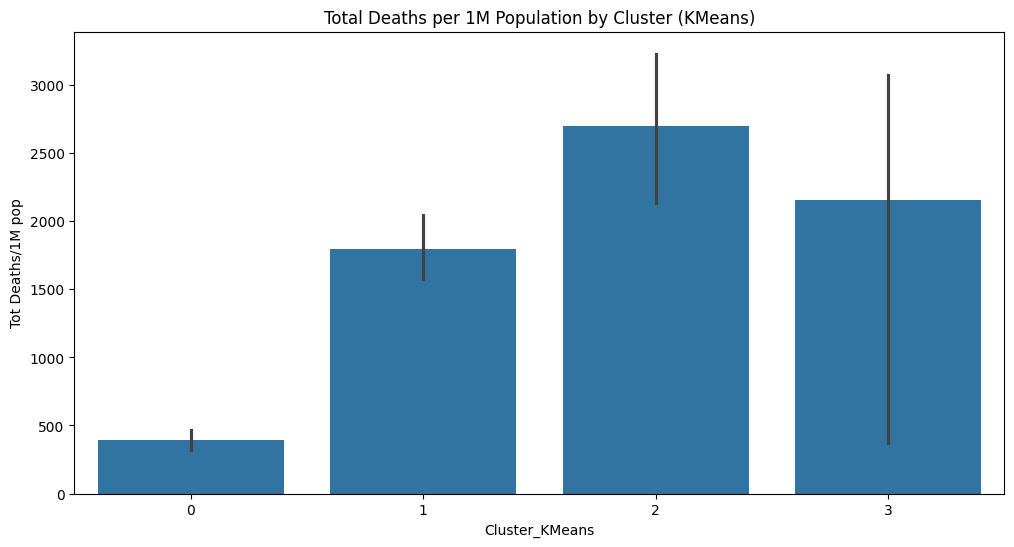

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='Cluster_KMeans', y='Tot Deaths/1M pop')
plt.title("Total Deaths per 1M Population by Cluster (KMeans)")
plt.show()


The barplot for Total Deaths per 1M Population by Cluster (KMeans) shows a clear disparity in COVID-19 severity across the four clusters. Cluster 0 exhibits the lowest deaths per million, indicating countries with limited outbreak impact and strong pandemic response. Cluster 1 displays a moderate increase in mortality burden, suggesting smaller populations with relatively high fatality outcomes or limited healthcare capacity. Cluster 2 represents the most severely affected group, with the highest deaths per million population, reflecting significant transmission spread and higher fatality rates. Meanwhile, Cluster 3 also shows a high number of deaths per million, though slightly lower than Cluster 2, and is likely associated with large-population countries experiencing widespread infection but with comparatively better survival outcomes. Overall, these patterns highlight that Clusters 2 and 3 require the highest policy attention, while Cluster 0 reflects the most successful containment or early intervention efforts.

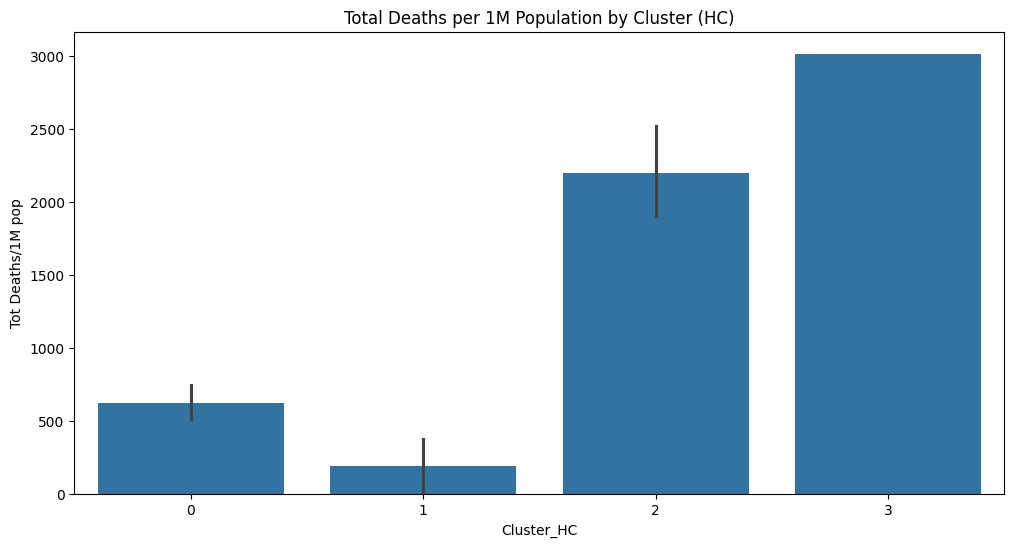

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='Cluster_HC', y='Tot Deaths/1M pop')
plt.title("Total Deaths per 1M Population by Cluster (HC)")
plt.show()


This bar plot summarizes the relationship between different Hierarchical Clusters (HC) and the average Total Deaths per 1 Million Population across the data points (e.g., countries) assigned to those clusters. The primary finding is a strong disparity in mortality rates among the groups identified by the clustering algorithm. Cluster 3 exhibits the highest average mortality rate, standing at approximately 3,000 deaths per 1M population, indicating this cluster contains regions that experienced the most severe impact. Conversely, Cluster 1 shows the lowest average rate, around 150-200 deaths per 1M population, suggesting these regions fared much better. Cluster 2 has a high average (around 2,200), but with notably greater variability (indicated by the longer error bar) compared to Cluster 3, implying more diverse outcomes within that group. Finally, Cluster 0 has a moderately low average of approximately 600 deaths per 1M population. In essence, the clustering successfully segmented the population into four distinct groups based on their total death rates, highlighting a clear separation between high-mortality clusters (2 and 3) and low-mortality clusters (0 and 1).

In [193]:
fig = px.choropleth(
    df_clean,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Cluster_KMeans",
    hover_name="Country",
    projection="natural earth",
    title="KMeans Clustering World Map"
)
fig.show()


This world map visually represents the results of a KMeans Clustering analysis, where countries are grouped into four distinct clusters (labeled 0, 1, 2, and 3) based on underlying data, with each cluster assigned a unique color as indicated by the legend on the right. The map reveals a geographic pattern in the resulting clusters: Cluster 0 (Dark Purple/Blue) appears to encompass many developed nations, including large parts of North America, Western Europe, Australia, and New Zealand; Cluster 3 (Yellow) is prominent in South America and parts of Africa; Cluster 2 (Orange/Red) covers countries in Central Asia, Russia, and other regions; and Cluster 1 (Lighter Purple) is present in various dispersed locations. The visualization effectively translates complex multivariate data relationships into a simple, geographically intuitive format, suggesting that the underlying variables used for the KMeans clustering (which are not specified in the image) are spatially correlated.

In [194]:
fig = px.choropleth(
    df_clean,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Cluster_HC",
    hover_name="Country",
    projection="natural earth",
    title="Hierarchical Clustering World Map"
)
fig.show()



This world map presents the results of a Hierarchical Clustering (HC) analysis, where countries have been grouped into four distinct clusters (labeled 0, 1, 2, and 3), with each cluster assigned a specific color from the legend. The resulting geographic distribution of the clusters is clearly visible: Cluster 0 (Dark Blue/Purple) is widely dispersed, covering significant portions of North America, Western Europe, Australia, and many parts of South America and Africa. Cluster 3 (Yellow) appears mainly in isolated coastal regions, such as parts of Central America and East Asia. Cluster 2 (Orange/Red) dominates much of Eastern Europe, Central Asia, Russia, and East Africa. Finally, Cluster 1 (Mid-Purple) is heavily concentrated across South Asia (e.g., India, Pakistan) and Southeast Asia. The visualization indicates that the Hierarchical Clustering algorithm has segmented the world based on the underlying variables (not specified in the image) in a manner that reveals distinct, geographically-correlated groups.

<h2>Cluster Profiling & Government policy recommendations based on your findings.

K-Means Clustering<br><br>
(1) Cluster Profiling

Cluster 0 -> Low Infection, Low Mortality
- Controlled spread or possible underreporting.
- Needs improvements in testing and reporting reliability.

Cluster 1 -> Very High Infection & Mortality per Million
- Uncontrolled transmission; hospitals overloaded.
- Requires urgent healthcare reinforcement.

Cluster 2 -> High Fatality Rate
- Weaker healthcare systems; late treatment response.
- Prioritize medical equipment and early intervention.

Cluster 3 -> High Infection but Lower Fatality
- Strong medical response despite large spread.
- Maintain vaccination and prevention efforts.

(2) Government Policy Recommendations

Cluster 0
- Increase testing coverage and digital reporting.
- Strengthen early detection systems.

Cluster 1
- Implement targeted lockdowns and rapid vaccination.
- Expand ICU and oxygen availability.

Cluster 2
- Improve healthcare access and treatment protocols.
- Provide international aid and expert support if necessary.

Cluster 3
- Continue preventive campaigns and booster vaccinations.
- Prepare for surge scenarios to avoid healthcare strain.

Hierarchical Clustering Result<br><br>
(1) Cluster Profiling

Cluster 0 -> Moderate Spread Cluster

- Spread controlled but still unstable.
- Continue monitoring and community health programs.

Cluster 1 -> Very Large Population, Low Cases per Million
- Strong possibility of underreporting.
- Needs stricter data accuracy systems.

Cluster 2 -> Severe Spread & Pressure Cluster
- Very high cases and healthcare pressure.
- Strong immediate medical support needed.

Cluster 3 -> High Total Cases & High Deaths
- Severe outbreak difficulty and fatalities.
- Emergency national mitigation strategies required.

(2) Government Policy Recommendations

Cluster 0

- Maintain strict public participation in health measures.
- Support preventive education.

Cluster 1

- Mandatory testing expansion and transparency audits.

- Improve digital case tracing.

Cluster 2

- Deploy medical reinforcement and mobile care units.

- Fast-track vaccination for high-risk populations.

Cluster 3

- National crisis response: lockdowns + rapid medical deployment.

- Strengthen vaccine distribution strategy.

<h2>Compare both models and select the best one and explain why one model is better than
the other.

Based on silhouette score evaluation, KMeans (0.4037) performs better than Hierarchical Clustering (0.3924). KMeans forms more compact and well-separated clusters in this dataset, making it more suitable for extracting meaningful insights about COVID-19 impact across countries. Therefore, KMeans was selected as the final model for profiling and policy recommendations.